In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
font = {'family': 'serif',
            'serif': 'palatino',
            #'sans-serif': 'Computer Modern Sans serif',
            'style': 'normal',
            'variant': 'normal',
            'stretch': 'normal',
            'weight': 'normal',
            'size': 12}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (6, 5)

In [3]:
new_color = 'seagreen'

colors = [
    (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
    (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
    (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
    (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
    (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
    (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
    (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
    (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
    (0.8, 0.7254901960784313, 0.4549019607843137),
    (0.39215686274509803, 0.7098039215686275, 0.803921568627451)
] + [new_color]

In [ ]:
################################
# Variables
################################
enthalpy_column = 4
window_size = 200000
Tmax = 400
Tmin = 100
total_steps=1000000000
stride=100
# Low T interval
min_temp1 = 100
max_temp1 = 220
# High T interval
min_temp2 = 220
max_temp2 = 400
# List of pressures - See filename below to choose this properly
pressures = np.array([0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])
#pressures = np.array([1000])
instances = np.arange(1,41)

# Plot True or False
plot_flag = True
################################

################################
# Some checks
################################
if min_temp1 > max_temp1:
    raise ValueError("min_temp1 must be smaller than max_temp1")
if min_temp2 > max_temp2:
    raise ValueError("min_temp2 must be smaller than max_temp2")
if max_temp1 > min_temp2:
    raise ValueError("max_temp1 must be smaller than min_temp2")
################################

#print("Pressures", "T_g")

################################
# Loop over pressures
################################
for press in pressures:
    mean_temperatures=[]
    mean_enthalpy=[]
    for instance in instances:
        # Load file
        filename = "/scratch/gpfs/rm6309/Roberto/Production/QuenchT-halfmicro/" + str(press) + "atm_" + str(instance) + "/thermo.txt"
        data = np.genfromtxt(filename)
        total_lines = len(data)
        if (total_lines != 10000001):
            print("wrong number of lines" + " in the file" + filename)
            continue
        data[:, 0] = Tmax + (Tmin - Tmax) * data[:, 0]/float(total_steps)
        if window_size > (total_lines - 1):
            raise ValueError("window_size = " + str(window_size) + " is < or = to the total lines = " + str(
                total_lines) + " in the file" + filename)
        # Calculate mean values of temperature and enthalpy for different windows
        mean_temperatures.append(np.array([np.mean(data[i:(i + window_size), 0]) for i in np.arange(0, total_lines, window_size)]))
        mean_enthalpy.append(np.array([np.mean(data[i:(i + window_size), enthalpy_column]) for i in np.arange(0, total_lines, window_size)]))
    mean_temperatures = np.mean(np.array(mean_temperatures),axis=0)
    mean_enthalpy = np.mean(np.array(mean_enthalpy),axis=0)
    
    np.savetxt("glass-" + str(press) + ".txt", np.stack([mean_temperatures, mean_enthalpy], axis=1), header="#temperature enthalpy", comments='')
                             
    #if plot_flag == True:
    plt.scatter(mean_temperatures,mean_enthalpy)
        
plt.ylabel("H [kcal/mol]")
plt.xlabel("T [K]")
plt.show()

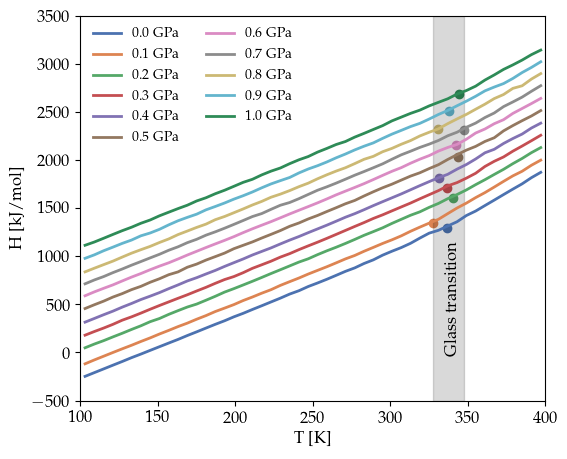

In [60]:
pressures = np.array([0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])
data1 = np.loadtxt('glasstransition.txt')

for press,color,i in zip(pressures,colors,np.arange(len(pressures))):
    data = np.loadtxt("glass-" + str(press) + ".txt")
    mean_temperatures = data[:,0]
    mean_enthalpy = data[:,1]
    plt.plot(mean_temperatures[:-1],mean_enthalpy[:-1]*4.184,label= '{0:3.1f}'.format(press*0.000101325) + " GPa",color=color, linewidth=2)
    plt.scatter(data1[i,1],data1[i,2]*4.184,color=color)

plt.fill_between([np.min(data1[:,1]),np.max(data1[:,1])],[-500,-500],[3500,3500],alpha=0.15,color='black')
plt.legend(ncol=2,fontsize=10,frameon=False)
plt.xlim([100,400])
plt.ylim([-500,3500])
plt.ylabel("H [kJ/mol]")
plt.xlabel("T [K]")
plt.text(335,10,'Glass transition',rotation=90)
plt.savefig("figs/T_glasses.pdf",bbox_inches='tight')
plt.show()

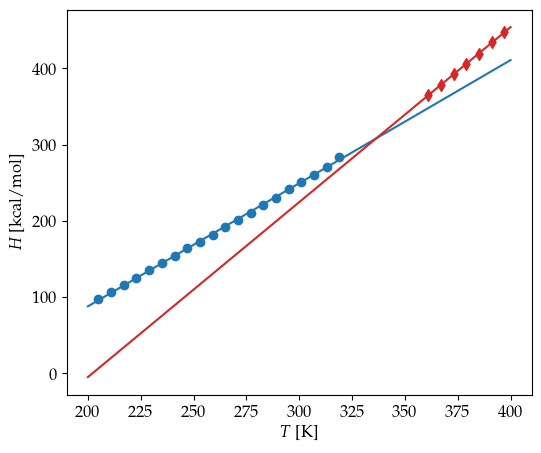

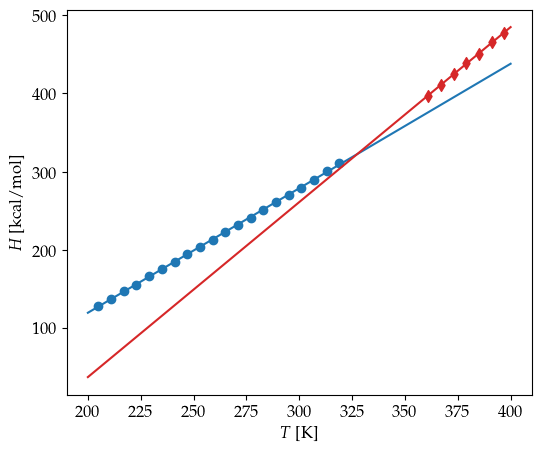

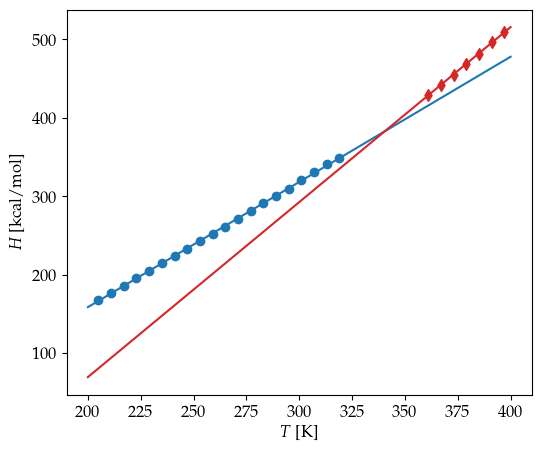

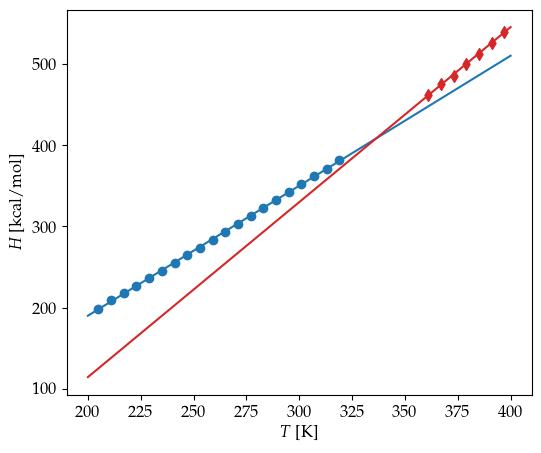

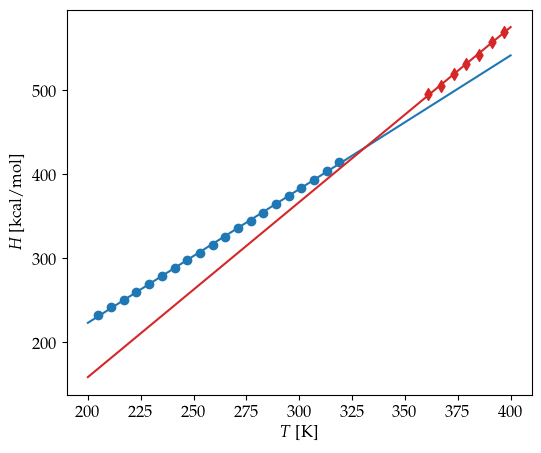

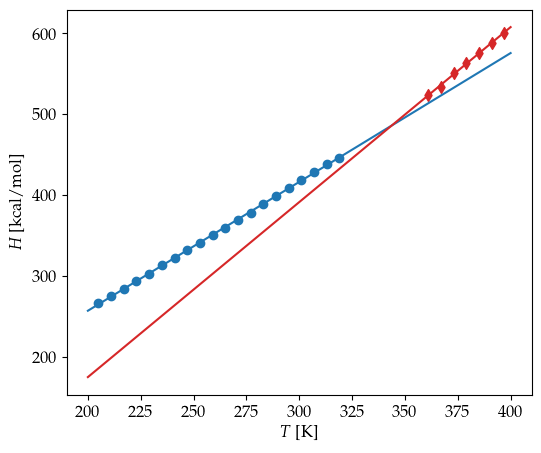

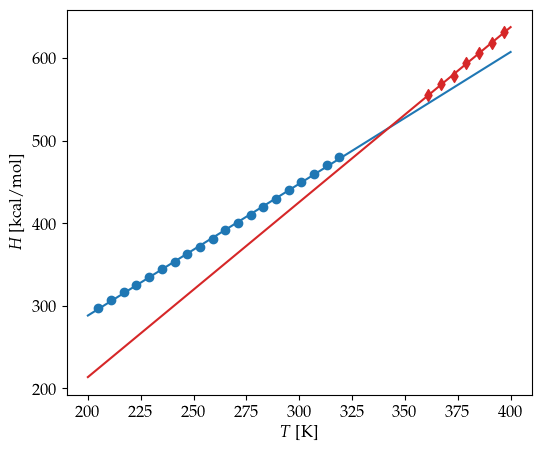

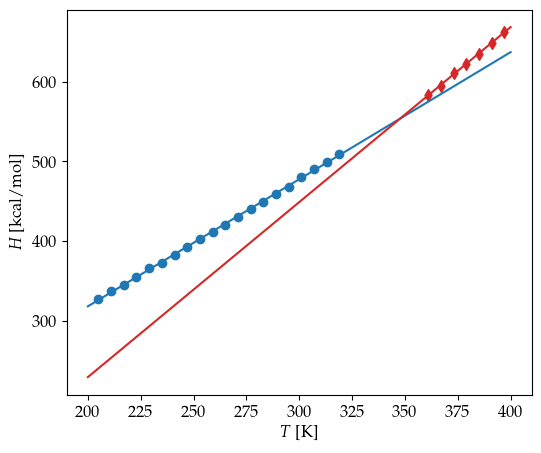

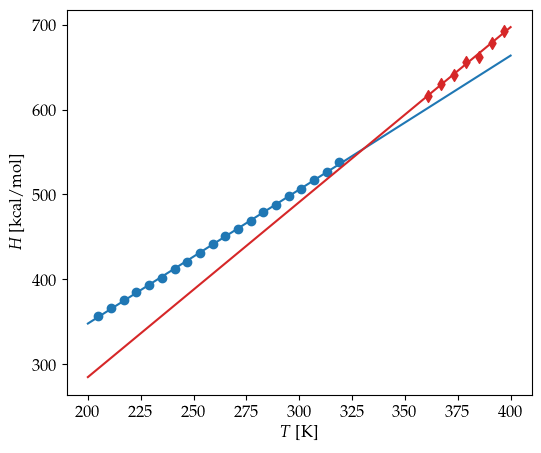

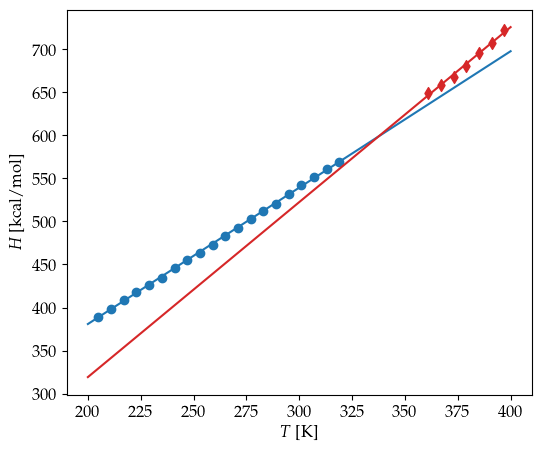

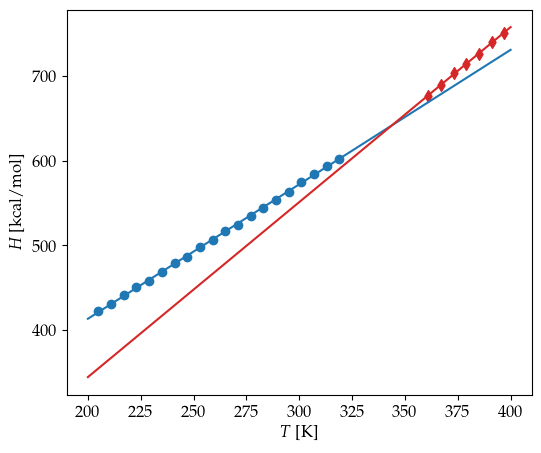

In [26]:
# Variables
################################
enthalpy_column = 4
window_size = 3000
Tmax = 400
Tmin = 100
total_steps=1000000000
stride=1
# Low T interval
min_temp1 = 200
max_temp1 = 325
# High T interval
min_temp2 = 360
max_temp2 = 400




# Plot True or False
plot_flag = True
################################

################################
# Some checks
################################
if min_temp1 > max_temp1:
    raise ValueError("min_temp1 must be smaller than max_temp1")
if min_temp2 > max_temp2:
    raise ValueError("min_temp2 must be smaller than max_temp2")
if max_temp1 > min_temp2:
    raise ValueError("max_temp1 must be smaller than min_temp2")
################################

#print("Pressures", "T_g")

################################
# Loop over pressures
################################
pressures = np.array([0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])
for press in pressures:
    data = np.loadtxt("glass-" + str(press) + ".txt")
    mean_temperatures = data[:,0]
    mean_enthalpy = data[:,1]
    # Fit straight lines to the mean values above
    # Low T fit
    region1 = np.logical_and(mean_temperatures > min_temp1, mean_temperatures < max_temp1)
    reg1 = LinearRegression().fit(mean_temperatures[region1].reshape(-1, 1), mean_enthalpy[region1])
    # High T fit
    region2 = np.logical_and(mean_temperatures > min_temp2, mean_temperatures < max_temp2)
    reg2 = LinearRegression().fit(mean_temperatures[region2].reshape(-1, 1), mean_enthalpy[region2])
    # Find crossing point between straight lines
    dummy_temperature = np.linspace(min_temp1, max_temp2, 10000)
    predict_low = reg1.predict(dummy_temperature.reshape(-1, 1))
    predict_high = reg2.predict(dummy_temperature.reshape(-1, 1))
    # Find points used for low T fit and high T fit
    points_low_T_fit = np.column_stack((mean_temperatures[region1], mean_enthalpy[region1]))
    points_high_T_fit = np.column_stack((mean_temperatures[region2], mean_enthalpy[region2]))
    crossing_temperature = dummy_temperature[np.argmin(np.abs(predict_low - predict_high))] 
    crossing_enthalpy = reg1.predict(crossing_temperature.reshape(-1,1))[0]
    with open("glasstransition.txt", "a") as file: 
        file.write(f"{press} {crossing_temperature} {crossing_enthalpy}\n")
    ################################
    # Plot
    ################################
    if plot_flag == True:
        #plt.scatter(points_low_T_fit[:, 0], points_low_T_fit[:, 1], label='Low T Data', color='cyan')
        plt.scatter(points_low_T_fit[::stride, 0], points_low_T_fit[::stride, 1], color='tab:blue')
        plt.scatter(points_high_T_fit[::stride, 0], points_high_T_fit[::stride, 1], color='tab:red', marker='d')
        #Plot the fitted lines
        plt.plot(dummy_temperature, predict_low, color='tab:blue')
        plt.plot(dummy_temperature, predict_high, color='tab:red')
        #plt.axvline(x=220.55205520552056, color='tab:gray', linestyle='--')
        #plt.xlim(170,300)
        #plt.ylim(1000,4000)
        plt.xlabel("$T$ [K]")
        plt.ylabel("$H$ [kcal/mol]")
        #plt.text(175, 3700, "5000 atm", fontsize=11, color='black')
        #plt.savefig("figs/Tglass.pdf",bbox_inches='tight')
        plt.show()

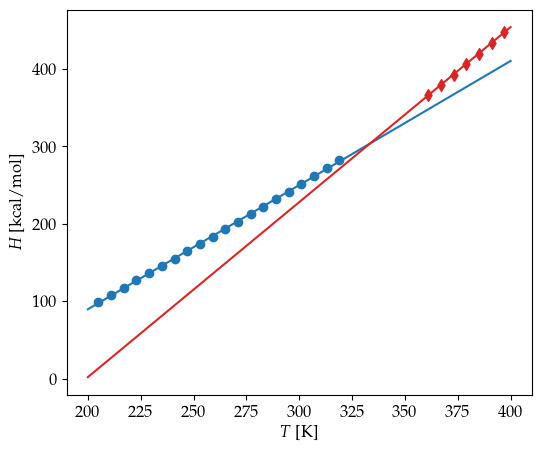

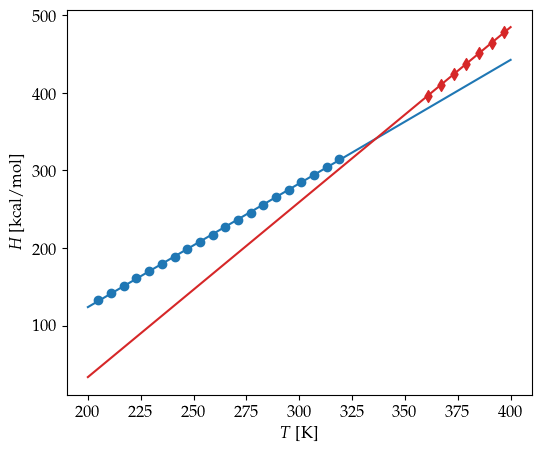

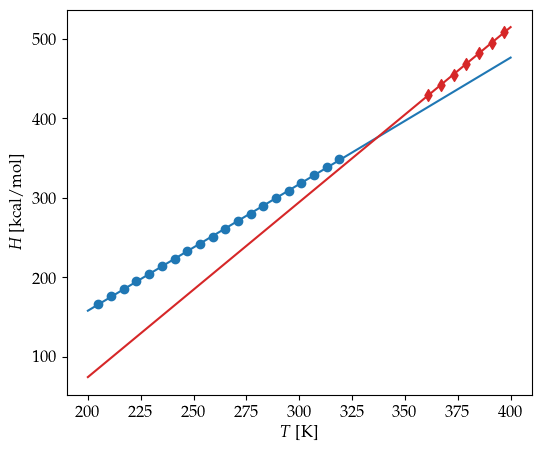

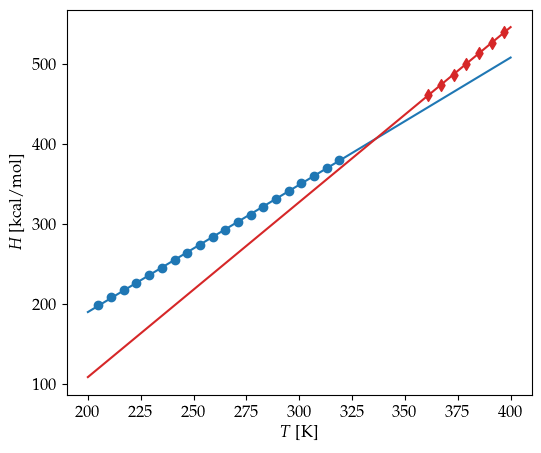

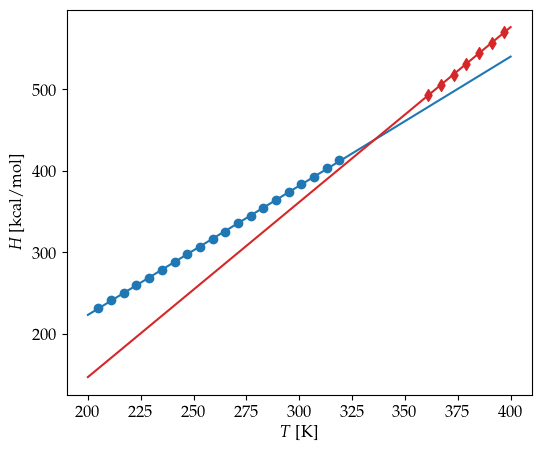

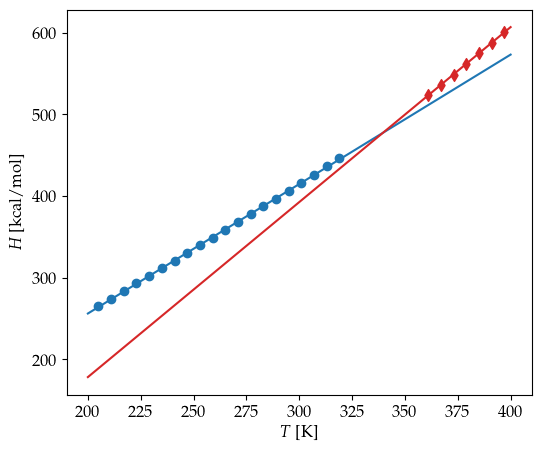

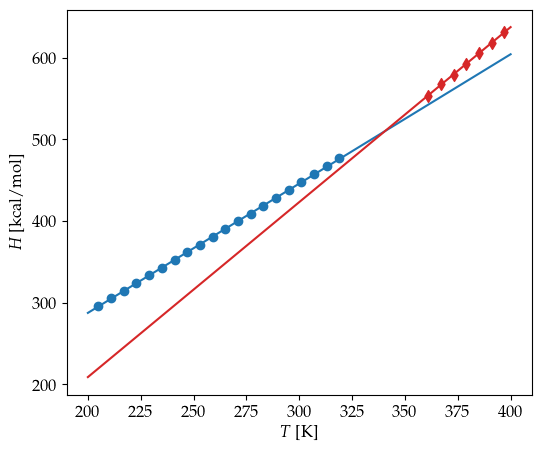

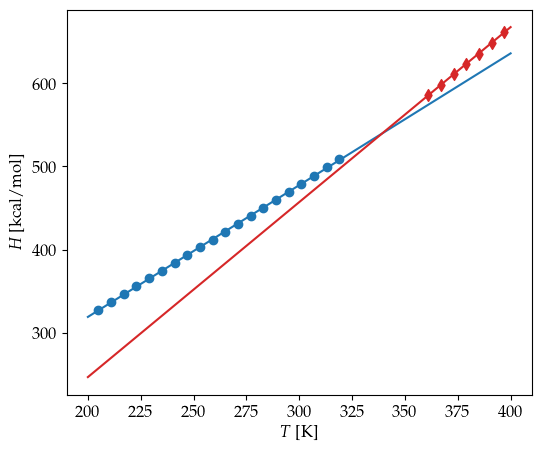

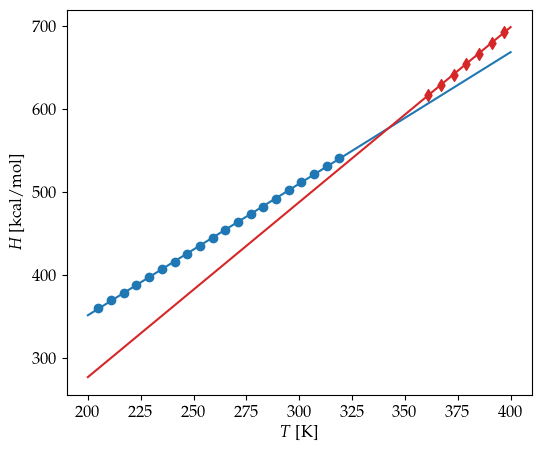

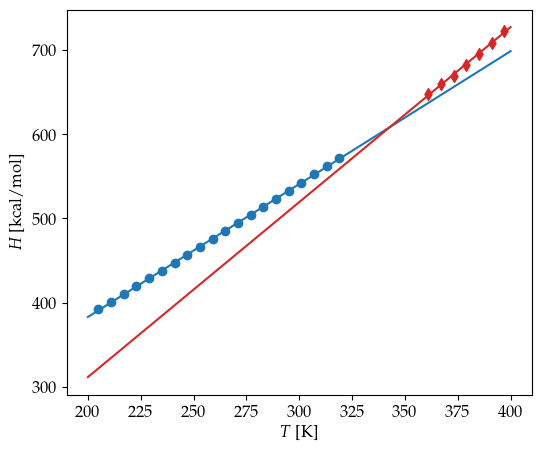

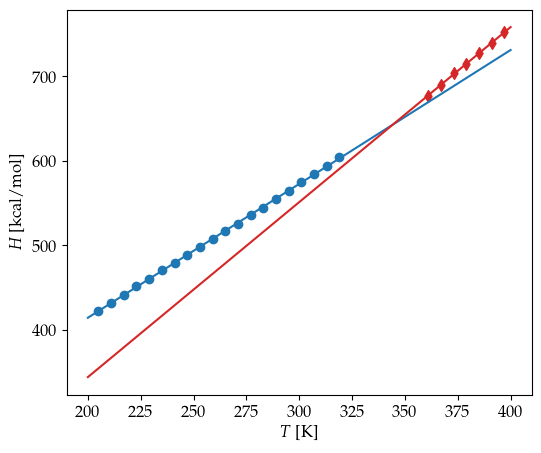

In [5]:
# Variables
################################
enthalpy_column = 4
window_size = 3000
Tmax = 400
Tmin = 100
total_steps=1000000000
stride=1
# Low T interval
min_temp1 = 200
max_temp1 = 325
# High T interval
min_temp2 = 360
max_temp2 = 400




# Plot True or False
plot_flag = True
################################

################################
# Some checks
################################
if min_temp1 > max_temp1:
    raise ValueError("min_temp1 must be smaller than max_temp1")
if min_temp2 > max_temp2:
    raise ValueError("min_temp2 must be smaller than max_temp2")
if max_temp1 > min_temp2:
    raise ValueError("max_temp1 must be smaller than min_temp2")
################################

#print("Pressures", "T_g")

################################
# Loop over pressures
################################
pressures = np.array([0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])
for press in pressures:
    data = np.loadtxt("glass-" + str(press) + ".txt")
    mean_temperatures = data[:,0]
    mean_enthalpy = data[:,1]
    # Fit straight lines to the mean values above
    # Low T fit
    region1 = np.logical_and(mean_temperatures > min_temp1, mean_temperatures < max_temp1)
    reg1 = LinearRegression().fit(mean_temperatures[region1].reshape(-1, 1), mean_enthalpy[region1])
    # High T fit
    region2 = np.logical_and(mean_temperatures > min_temp2, mean_temperatures < max_temp2)
    reg2 = LinearRegression().fit(mean_temperatures[region2].reshape(-1, 1), mean_enthalpy[region2])
    # Find crossing point between straight lines
    dummy_temperature = np.linspace(min_temp1, max_temp2, 10000)
    predict_low = reg1.predict(dummy_temperature.reshape(-1, 1))
    predict_high = reg2.predict(dummy_temperature.reshape(-1, 1))
    # Find points used for low T fit and high T fit
    points_low_T_fit = np.column_stack((mean_temperatures[region1], mean_enthalpy[region1]))
    points_high_T_fit = np.column_stack((mean_temperatures[region2], mean_enthalpy[region2]))
    crossing_temperature = dummy_temperature[np.argmin(np.abs(predict_low - predict_high))] 
    crossing_enthalpy = reg1.predict(crossing_temperature.reshape(-1,1))[0]
    with open("glasstransition.txt", "a") as file: 
        file.write(f"{press} {crossing_temperature} {crossing_enthalpy}\n")
    ################################
    # Plot
    ################################
    if plot_flag == True:
        #plt.scatter(points_low_T_fit[:, 0], points_low_T_fit[:, 1], label='Low T Data', color='cyan')
        plt.scatter(points_low_T_fit[::stride, 0], points_low_T_fit[::stride, 1], color='tab:blue')
        plt.scatter(points_high_T_fit[::stride, 0], points_high_T_fit[::stride, 1], color='tab:red', marker='d')
        #Plot the fitted lines
        plt.plot(dummy_temperature, predict_low, color='tab:blue')
        plt.plot(dummy_temperature, predict_high, color='tab:red')
        #plt.axvline(x=220.55205520552056, color='tab:gray', linestyle='--')
        #plt.xlim(170,300)
        #plt.ylim(1000,4000)
        plt.xlabel("$T$ [K]")
        plt.ylabel("$H$ [kcal/mol]")
        #plt.text(175, 3700, "5000 atm", fontsize=11, color='black')
        #plt.savefig("figs/Tglass.pdf",bbox_inches='tight')
        plt.show()

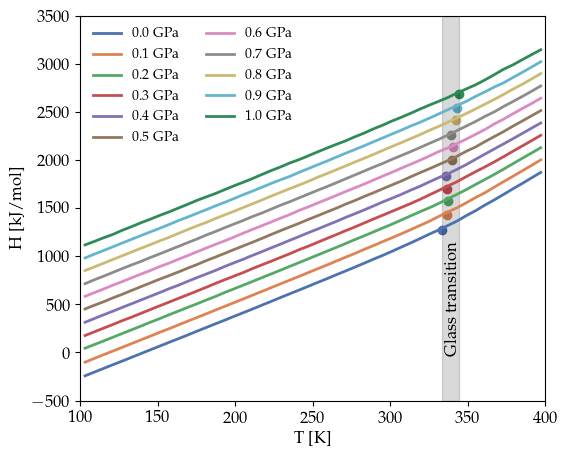

In [6]:
pressures = np.array([0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])
data1 = np.loadtxt('glasstransition.txt')

for press,color,i in zip(pressures,colors,np.arange(len(pressures))):
    data = np.loadtxt("glass-" + str(press) + ".txt")
    mean_temperatures = data[:,0]
    mean_enthalpy = data[:,1]
    plt.plot(mean_temperatures[:-1],mean_enthalpy[:-1]*4.184,label= '{0:3.1f}'.format(press*0.000101325) + " GPa",color=color, linewidth=2)
    plt.scatter(data1[i,1],data1[i,2]*4.184,color=color)

plt.fill_between([np.min(data1[:,1]),np.max(data1[:,1])],[-500,-500],[3500,3500],alpha=0.15,color='black')
plt.legend(ncol=2,fontsize=10,frameon=False)
plt.xlim([100,400])
plt.ylim([-500,3500])
plt.ylabel("H [kJ/mol]")
plt.xlabel("T [K]")
plt.text(335,10,'Glass transition',rotation=90)
plt.savefig("figs/T_glasses.pdf",bbox_inches='tight')
plt.show()

In [12]:
# Variables
################################
enthalpy_column = 4
window_size = 3000
Tmax = 400
Tmin = 100
total_steps=1000000000
stride=1
# Low T interval
min_temp1 = 200
max_temp1 = 325
# High T interval
min_temp2 = 360
max_temp2 = 400




# Plot True or False
plot_flag = True
################################

################################
# Some checks
################################
if min_temp1 > max_temp1:
    raise ValueError("min_temp1 must be smaller than max_temp1")
if min_temp2 > max_temp2:
    raise ValueError("min_temp2 must be smaller than max_temp2")
if max_temp1 > min_temp2:
    raise ValueError("max_temp1 must be smaller than min_temp2")
################################

#print("Pressures", "T_g")

################################
# Loop over pressures
################################
pressures = np.array([0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])
for press in pressures:
    data = np.loadtxt("glass-error-" + str(press) + ".txt")
    mean_temperatures = data[:,0]
    mean_enthalpy = data[:,1]+data[:,2]
    # Fit straight lines to the mean values above
    # Low T fit
    region1 = np.logical_and(mean_temperatures > min_temp1, mean_temperatures < max_temp1)
    reg1 = LinearRegression().fit(mean_temperatures[region1].reshape(-1, 1), mean_enthalpy[region1])
    # High T fit
    region2 = np.logical_and(mean_temperatures > min_temp2, mean_temperatures < max_temp2)
    reg2 = LinearRegression().fit(mean_temperatures[region2].reshape(-1, 1), mean_enthalpy[region2])
    # Find crossing point between straight lines
    dummy_temperature = np.linspace(min_temp1, max_temp2, 10000)
    predict_low = reg1.predict(dummy_temperature.reshape(-1, 1))
    predict_high = reg2.predict(dummy_temperature.reshape(-1, 1))
    # Find points used for low T fit and high T fit
    points_low_T_fit = np.column_stack((mean_temperatures[region1], mean_enthalpy[region1]))
    points_high_T_fit = np.column_stack((mean_temperatures[region2], mean_enthalpy[region2]))
    crossing_temperature = dummy_temperature[np.argmin(np.abs(predict_low - predict_high))] 
    crossing_enthalpy = reg1.predict(crossing_temperature.reshape(-1,1))[0]
    with open("glasstransition_plus.txt", "a") as file: 
        file.write(f"{press} {crossing_temperature} {crossing_enthalpy}\n")


In [13]:
# Variables
################################
enthalpy_column = 4
window_size = 3000
Tmax = 400
Tmin = 100
total_steps=1000000000
stride=1
# Low T interval
min_temp1 = 200
max_temp1 = 325
# High T interval
min_temp2 = 360
max_temp2 = 400




# Plot True or False
plot_flag = True
################################

################################
# Some checks
################################
if min_temp1 > max_temp1:
    raise ValueError("min_temp1 must be smaller than max_temp1")
if min_temp2 > max_temp2:
    raise ValueError("min_temp2 must be smaller than max_temp2")
if max_temp1 > min_temp2:
    raise ValueError("max_temp1 must be smaller than min_temp2")
################################

#print("Pressures", "T_g")

################################
# Loop over pressures
################################
pressures = np.array([0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])
for press in pressures:
    data = np.loadtxt("glass-error-" + str(press) + ".txt")
    mean_temperatures = data[:,0]
    mean_enthalpy = data[:,1]-data[:,2]
    # Fit straight lines to the mean values above
    # Low T fit
    region1 = np.logical_and(mean_temperatures > min_temp1, mean_temperatures < max_temp1)
    reg1 = LinearRegression().fit(mean_temperatures[region1].reshape(-1, 1), mean_enthalpy[region1])
    # High T fit
    region2 = np.logical_and(mean_temperatures > min_temp2, mean_temperatures < max_temp2)
    reg2 = LinearRegression().fit(mean_temperatures[region2].reshape(-1, 1), mean_enthalpy[region2])
    # Find crossing point between straight lines
    dummy_temperature = np.linspace(min_temp1, max_temp2, 10000)
    predict_low = reg1.predict(dummy_temperature.reshape(-1, 1))
    predict_high = reg2.predict(dummy_temperature.reshape(-1, 1))
    # Find points used for low T fit and high T fit
    points_low_T_fit = np.column_stack((mean_temperatures[region1], mean_enthalpy[region1]))
    points_high_T_fit = np.column_stack((mean_temperatures[region2], mean_enthalpy[region2]))
    crossing_temperature = dummy_temperature[np.argmin(np.abs(predict_low - predict_high))] 
    crossing_enthalpy = reg1.predict(crossing_temperature.reshape(-1,1))[0]
    with open("glasstransition_minus.txt", "a") as file: 
        file.write(f"{press} {crossing_temperature} {crossing_enthalpy}\n")

333.8333833383339 343.1343134313431 333.0933093309331 345.37453745374535


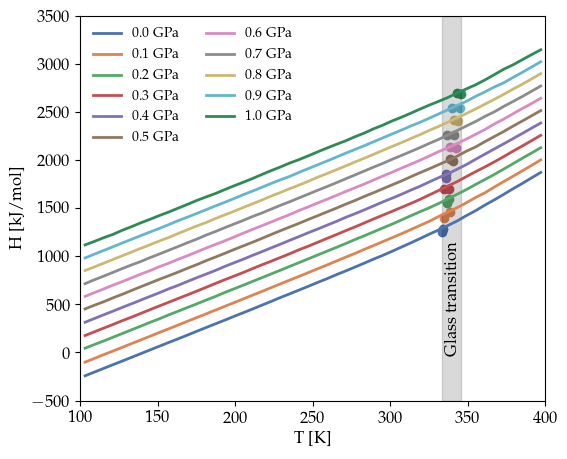

-5.180518051805166 3.8203820382038316


In [14]:
pressures = np.array([0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])
data1 = np.loadtxt('glasstransition_plus.txt')
data2 = np.loadtxt('glasstransition_minus.txt')

for press,color,i in zip(pressures,colors,np.arange(len(pressures))):
    data = np.loadtxt("glass-" + str(press) + ".txt")
    mean_temperatures = data[:,0]
    mean_enthalpy = data[:,1]
    plt.plot(mean_temperatures[:-1],mean_enthalpy[:-1]*4.184,label= '{0:3.1f}'.format(press*0.000101325) + " GPa",color=color, linewidth=2)
    plt.scatter(data1[i,1],data1[i,2]*4.184,color=color)
    plt.scatter(data2[i,1],data2[i,2]*4.184,color=color)

plt.fill_between([np.min(data2[:,1]),np.max(data2[:,1])],[-500,-500],[3500,3500],alpha=0.15,color='black')
plt.legend(ncol=2,fontsize=10,frameon=False)
plt.xlim([100,400])
plt.ylim([-500,3500])
plt.ylabel("H [kJ/mol]")
plt.xlabel("T [K]")
plt.text(335,10,'Glass transition',rotation=90)
plt.savefig("figs/T_glasses_errors.pdf",bbox_inches='tight')
print(np.min(data1[:,1]),np.max(data1[:,1]),np.min(data2[:,1]),np.max(data2[:,1]))
plt.show()

diff = data1[:,1] - data2[:,1]
print(np.min(diff), np.max(diff))